In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/epitope-prediction/input_sars.csv
/kaggle/input/epitope-prediction/input_covid.csv
/kaggle/input/epitope-prediction/input_bcell.csv


In [2]:
df_bcell=pd.read_csv("../input/epitope-prediction/input_bcell.csv")
df_covid=pd.read_csv("../input/epitope-prediction/input_covid.csv")
df_sars=pd.read_csv("../input/epitope-prediction/input_sars.csv")

# BCELL

In [3]:
df_bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [4]:
df_bcell.tail()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
14382,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,177,191,QVHAEQGLIQYPTAW,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,189,203,TAWQSVGHMMVIFRL,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1479,1493,KRAHGQDLGTLGSCL,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0
14386,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1647,1661,STVKAGDLEKIISRC,0.962,0.257,1.045,2.127,9.553040,0.044338,-0.671001,29.494308,1


In [5]:
df_bcell.isna().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [6]:
df_bcell.dtypes

parent_protein_id       object
protein_seq             object
start_position           int64
end_position             int64
peptide_seq             object
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_Y=LabelEncoder()
df_bcell.iloc[:,0]=labelEncoder_Y.fit_transform(df_bcell.iloc[:,0].values)
df_bcell.iloc[:,1]=labelEncoder_Y.fit_transform(df_bcell.iloc[:,1].values)
df_bcell.iloc[:,4]=labelEncoder_Y.fit_transform(df_bcell.iloc[:,4].values)

In [8]:
df_bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,3,200,161,165,11098,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,43,684,251,255,6651,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,89,709,145,149,397,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,94,693,152,156,11615,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,108,614,85,89,1545,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [9]:
df_bcell.dtypes

parent_protein_id        int64
protein_seq              int64
start_position           int64
end_position             int64
peptide_seq              int64
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

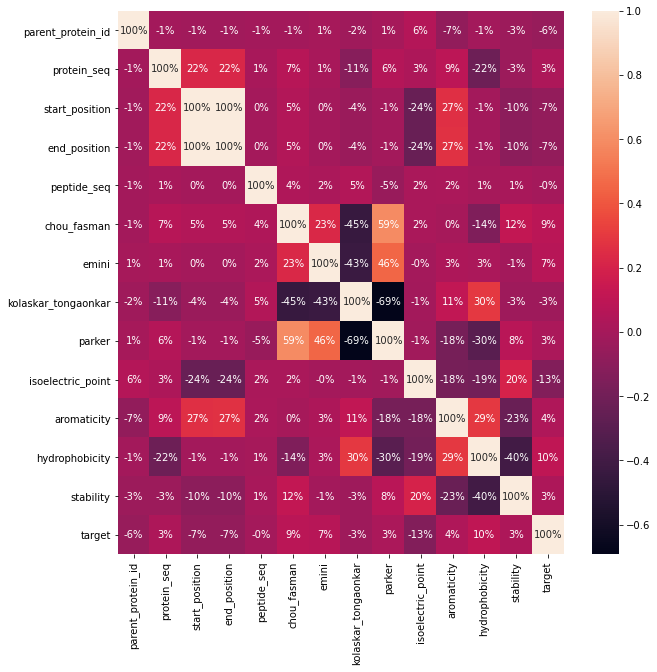

In [10]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_bcell.corr(), annot=True,fmt=".0%")
plt.show()

# COVID

In [11]:
df_covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


In [12]:
df_covid.tail()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
20307,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1258,1277,YVRKDGEWVLLSTFLGHHHH,0.947,0.406,1.063,0.155,6.03595,0.10929,-0.138642,31.377603
20308,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1259,1278,VRKDGEWVLLSTFLGHHHHH,0.937,0.353,1.061,0.355,6.03595,0.10929,-0.138642,31.377603
20309,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1260,1279,RKDGEWVLLSTFLGHHHHHH,0.960,0.647,1.047,0.645,6.03595,0.10929,-0.138642,31.377603
20310,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1261,1280,KDGEWVLLSTFLGHHHHHHH,0.960,0.449,1.058,0.540,6.03595,0.10929,-0.138642,31.377603
20311,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1262,1281,DGEWVLLSTFLGHHHHHHHH,0.957,0.306,1.067,0.360,6.03595,0.10929,-0.138642,31.377603


In [13]:
df_covid.isna().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
dtype: int64

In [14]:
df_covid.dtypes

parent_protein_id       object
protein_seq             object
start_position           int64
end_position             int64
peptide_seq             object
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_Y=LabelEncoder()
df_covid.iloc[:,0]=labelEncoder_Y.fit_transform(df_covid.iloc[:,0].values)
df_covid.iloc[:,1]=labelEncoder_Y.fit_transform(df_covid.iloc[:,1].values)
df_covid.iloc[:,4]=labelEncoder_Y.fit_transform(df_covid.iloc[:,4].values)

In [16]:
df_covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,0,0,1,5,10391,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,0,0,2,6,5304,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,0,0,3,7,7100,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,0,0,4,8,9725,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,0,0,5,9,12791,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


In [17]:
df_covid.dtypes

parent_protein_id        int64
protein_seq              int64
start_position           int64
end_position             int64
peptide_seq              int64
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
dtype: object

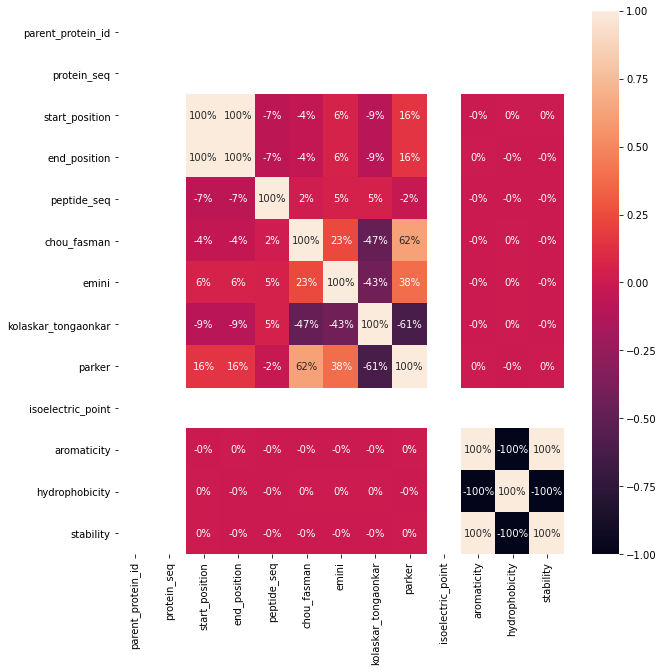

In [18]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_covid.corr(), annot=True,fmt=".0%")
plt.show()

# SARS

In [19]:
df_sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [20]:
df_sars.tail()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
515,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1231,1245,SCGSCCKFDEDDSEP,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
516,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1234,1255,SCCKFDEDDSEPVLKGVKLHYT,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
517,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1255,CKFDEDDSEPVLKGVKLHYT,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
518,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1250,CKFDEDDSEPVLKGV,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0
519,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1241,1255,DDSEPVLKGVKLHYT,1.028,1.675,1.056,2.207,5.569763,0.116335,-0.061116,33.205116,0


In [21]:
df_sars.isna().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [22]:
df_sars.dtypes

parent_protein_id       object
protein_seq             object
start_position           int64
end_position             int64
peptide_seq             object
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_Y=LabelEncoder()
df_sars.iloc[:,0]=labelEncoder_Y.fit_transform(df_sars.iloc[:,0].values)
df_sars.iloc[:,1]=labelEncoder_Y.fit_transform(df_sars.iloc[:,1].values)
df_sars.iloc[:,4]=labelEncoder_Y.fit_transform(df_sars.iloc[:,4].values)

In [24]:
df_sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,0,0,1,17,263,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,0,0,1,15,262,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,0,0,2,10,108,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,0,0,6,20,231,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,0,0,9,25,425,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [25]:
df_sars.dtypes

parent_protein_id        int64
protein_seq              int64
start_position           int64
end_position             int64
peptide_seq              int64
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

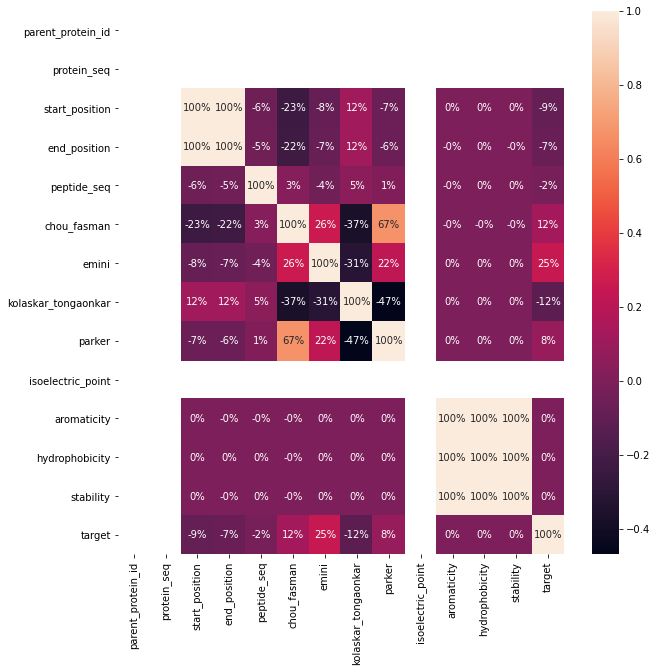

In [26]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_sars.corr(), annot=True,fmt=".0%")
plt.show()

# BCELL VS SARS

In [27]:
#Split the data set into independent(x) and dependent (y) data sets
x=df_bcell.iloc[:,1:14].values
y=df_bcell.iloc[:,0].values.reshape(-1,1)
x_test  = df_sars.drop("parent_protein_id",axis=1).copy()

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.469,random_state=42)

In [29]:
#scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
x_train.shape

(7639, 13)

In [31]:
x_test.shape

(6748, 13)

In [32]:
y_train.shape

(7639, 1)

In [33]:
y_test.shape

(6748, 1)

In [34]:
def models(x_train,y_train):
  #Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=42)
  log.fit(x_train,y_train)
  
  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=15,criterion="entropy",random_state=0)
  forest.fit(x_train,y_train)

  #Print the models accuracy on the training data
  print("[0]Logistic Regression Training Accuracy:",log.score(x_train,y_train))
  print("[1]Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
  print("[2]Random Forest Classifier Training Accuracy:",forest.score(x_train,y_train))
  
  return log,tree,forest

In [35]:
#Getting all of the models
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8840162324911638
[1]Decision Tree Classifier Training Accuracy: 0.9998690928131955
[2]Random Forest Classifier Training Accuracy: 0.9998690928131955


In [36]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix


for i in range(len(model)):
  print("Model ", i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))

  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print("Testing Accuracy = ", (TP+TN) / (TP+TN+FN+FP))
  print()

Model  0
[[0 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  1.0

Model  1
[[0 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  1.0

Model  2
[[0 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  1.0



In [37]:
#show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model) ):
  print("Model ",i)
  print( classification_report(y_test,model[i].predict(x_test)))
  print( accuracy_score(y_test,model[i].predict(x_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.35      0.86      0.50         7
           3       0.20      0.33      0.25         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.86      1.00      0.93        50
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.83      0.62      0.71         8
          21       0.00      0.00      0.00         3
          23       0.38      0.50      0.43        10
          25       0.00      0.00      0.00         1
          28      

In [38]:
pred=model[2].predict(x_test)
print(pred)

[224 145  23 ... 408 184 458]
